# Task 2 : Prediction using Unsupervised ML
From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [2]:
iris = pd.read_csv('F:\Iris.csv')

# Display the dataset

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 6)

In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Check the presence of missing value

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Bar Plot : Here the frequency of the observation is plotted.In this case we are plotting the frequency of the three species in the Iris Dataset

C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


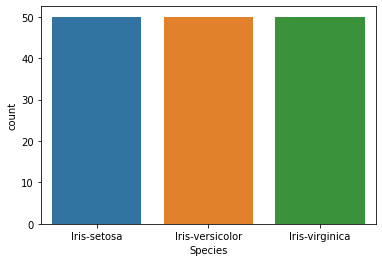

In [13]:
import seaborn as sns
sns.countplot('Species',data=iris)
plt.show()

# Check Outliers in dataset

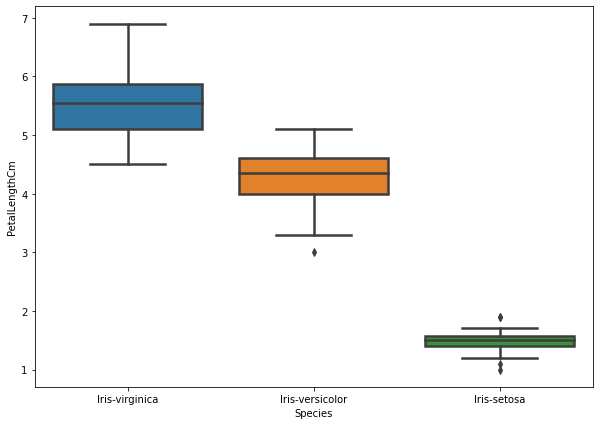

In [14]:
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='PetalLengthCm',data=iris,order=['Iris-virginica','Iris-versicolor','Iris-setosa'],linewidth=2.5,orient='v',dodge=False)

Now as we're gonna apply the KMeans Algorithm on this,the Algorithm is very sensitive to outliers as well as Distributions,so lets have a look at the statistical plots of the features,and then make some changes in the Distribution of the Features!

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [18]:
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [19]:
train = iris.drop(['Species'],axis = 1)

In [20]:
import scipy.stats as stats

In [21]:
def makeplots(col):
    
    plt.figure(figsize=(15,7))
    plt.subplot(1,3,1)
    plt.hist(iris[col],color='salmon')
    
    plt.subplot(1,3,2)
    stats.probplot(iris[col],dist='norm',plot=plt)
    
    
    plt.subplot(1,3,3)
    sn.boxplot(iris[col],color='pink')
    plt.show()
    

 Statistical Plots for the Feature : Id are shown ↓


C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


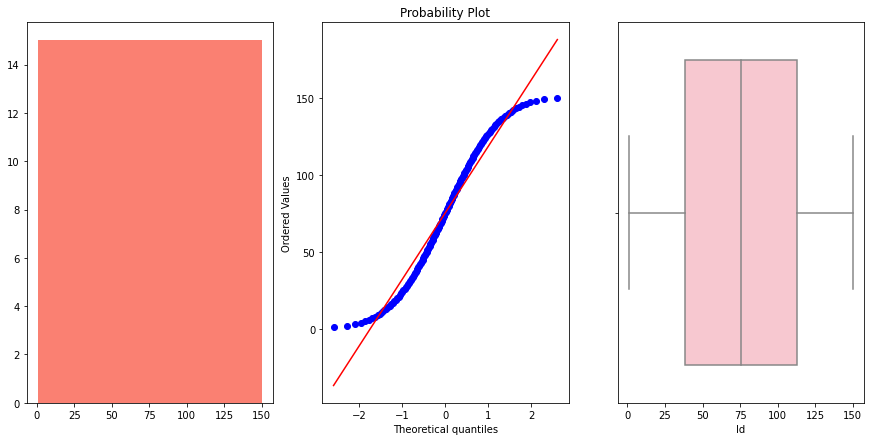

---------------------------------------------------------------------------
 Statistical Plots for the Feature : SepalLengthCm are shown ↓


C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


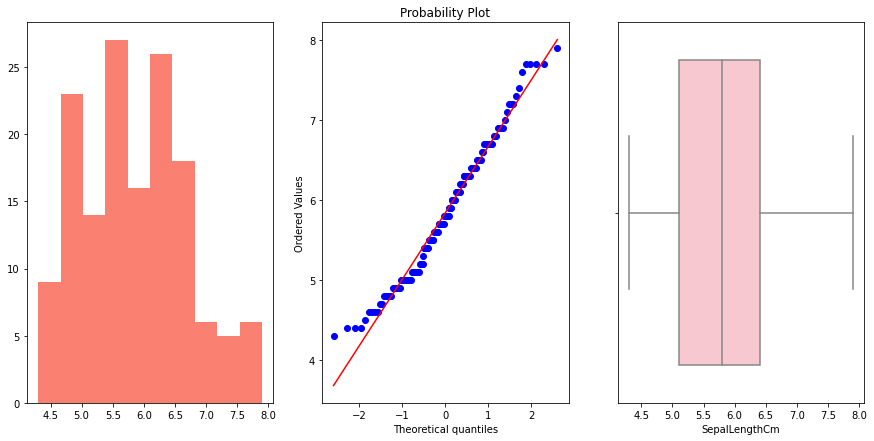

---------------------------------------------------------------------------
 Statistical Plots for the Feature : SepalWidthCm are shown ↓


C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


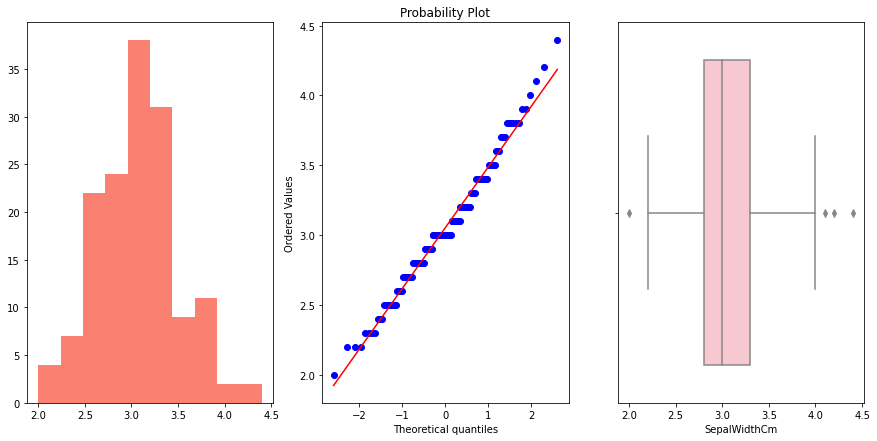

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalLengthCm are shown ↓


C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


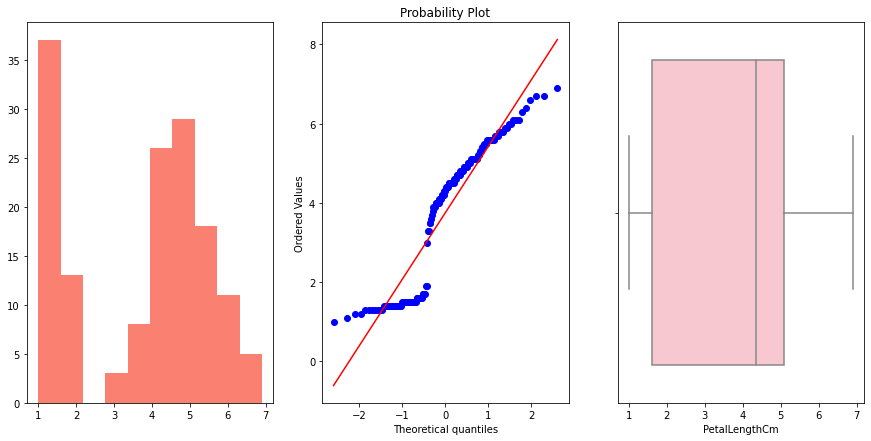

---------------------------------------------------------------------------
 Statistical Plots for the Feature : PetalWidthCm are shown ↓


C:\Users\Shivani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


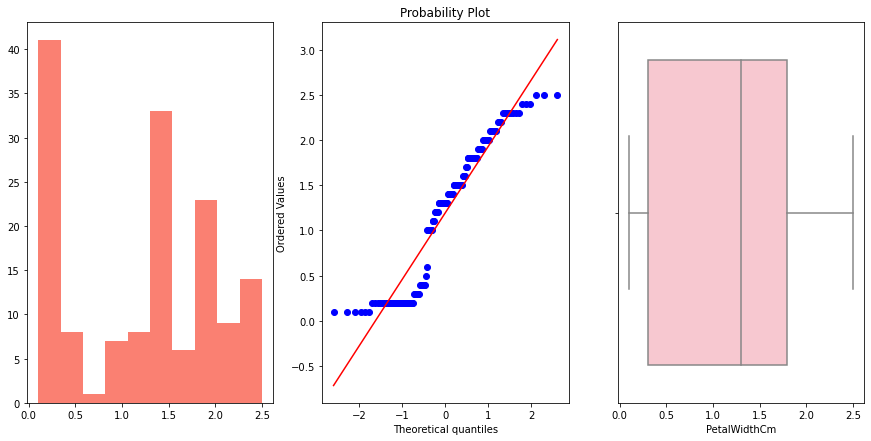

---------------------------------------------------------------------------


In [22]:
for i in train.columns:
    print(f' Statistical Plots for the Feature : {i} are shown ↓')
    makeplots(i)
    print("-"*75)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

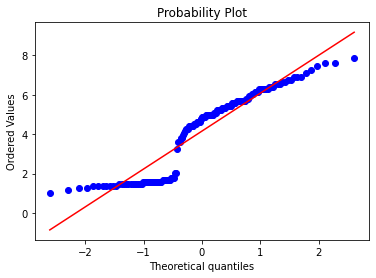

In [24]:
temp = train.copy()
temp['PetalLengthCm'],params = stats.boxcox(temp['PetalLengthCm']+1)
stats.probplot(temp['PetalLengthCm'],dist = 'norm',plot=plt)

((array([-2.60376328, -2.283875  , -2.1005573 , -1.96875864, -1.86428437,
         -1.77691182, -1.70131573, -1.63435332, -1.57400778, -1.51890417,
         -1.46806125, -1.42075308, -1.37642684, -1.33465133, -1.29508341,
         -1.25744533, -1.22150891, -1.18708433, -1.15401181, -1.12215558,
         -1.0913992 , -1.06164202, -1.03279638, -1.00478546, -0.97754152,
         -0.95100448, -0.92512081, -0.89984257, -0.87512664, -0.85093408,
         -0.8272296 , -0.80398107, -0.78115919, -0.75873709, -0.73669013,
         -0.71499557, -0.69363244, -0.67258128, -0.65182406, -0.63134396,
         -0.61112532, -0.59115349, -0.57141472, -0.55189613, -0.53258558,
         -0.51347162, -0.49454346, -0.47579085, -0.45720409, -0.43877397,
         -0.4204917 , -0.40234892, -0.38433762, -0.36645016, -0.3486792 ,
         -0.33101768, -0.31345882, -0.29599609, -0.27862316, -0.26133393,
         -0.24412247, -0.22698303, -0.20991002, -0.19289797, -0.17594158,
         -0.15903562, -0.142175  , -0.

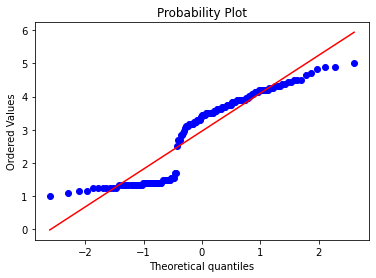

In [25]:
data = train.copy()
data['PetalLengthCm'] = data.PetalLengthCm**(1/1.2)
stats.probplot(data['PetalLengthCm'],dist='norm',plot=plt)

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

In [27]:
sc = StandardScaler()
train = iris.iloc[:,[0,1,2,3]].values
train_scaled = sc.fit_transform(train)

In [35]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
predictions = kmeans.fit_predict(train)
predictions

C:\Users\Shivani\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
kmeans.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464],
       [125.5  ,   6.588,   2.974,   5.552],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

In [37]:
kmeans.cluster_centers_[0][:3][0]

25.5

In [38]:
kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1]

(array([ 25.5, 125.5,  75.5]), array([5.006, 6.588, 5.936]))

In [39]:
kmeans.cluster_centers_[:,0][0]

25.5

# Cluster Visualisation ~ 2D

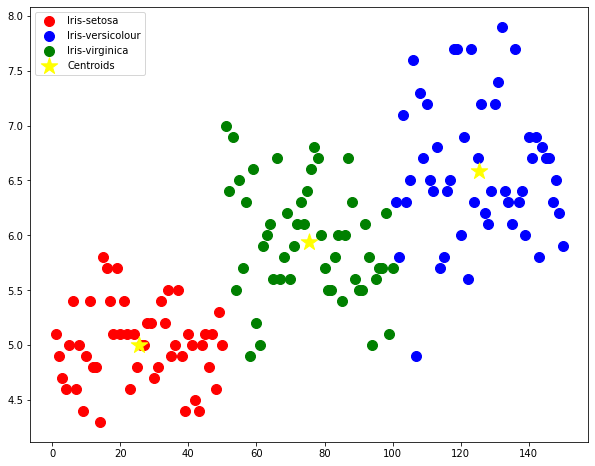

In [40]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(train[predictions == 0, 0], train[predictions == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(train[predictions == 1, 0], train[predictions == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(train[predictions == 2, 0], train[predictions == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = 'yellow', label = 'Centroids', marker='*')

plt.legend()

# Cluster Visualisation ~ 3D

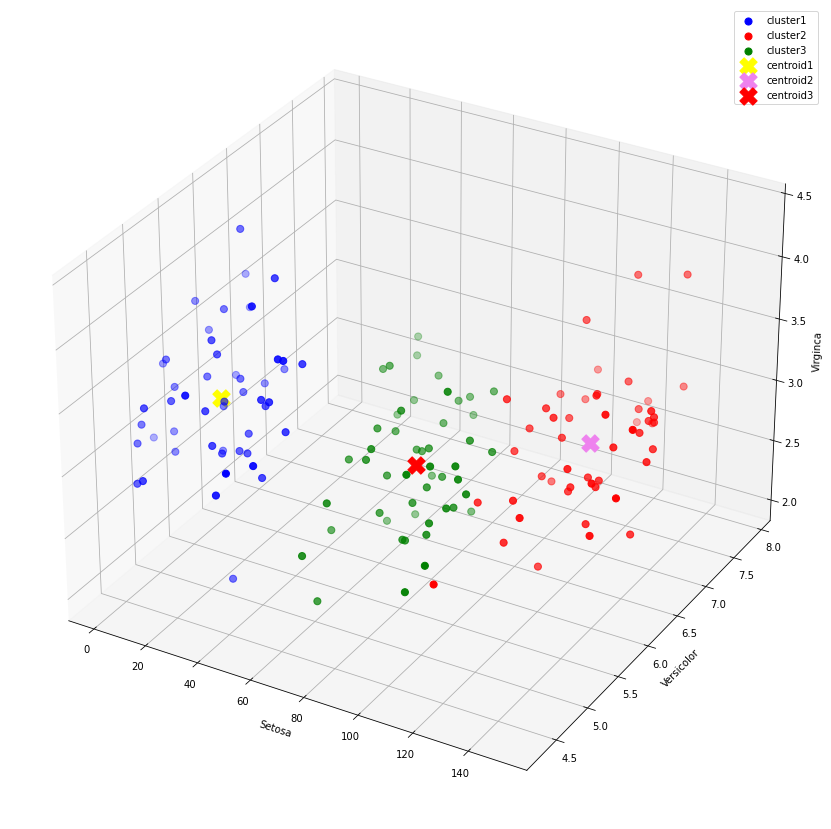

In [41]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(train[predictions==0,0],train[predictions==0,1],train[predictions==0,2],s = 50,color = 'blue',label = 'cluster1')
ax.scatter(train[predictions==1,0],train[predictions==1,1],train[predictions==1,2],s = 50,color = 'red',label = 'cluster2')
ax.scatter(train[predictions==2,0],train[predictions==2,1],train[predictions==2,2],s = 50,color = 'green',label = 'cluster3')

ax.scatter(kmeans.cluster_centers_[0][:3][0],kmeans.cluster_centers_[0][:3][1],kmeans.cluster_centers_[0][:3][2]
           ,s = 300,color = 'yellow',label = 'centroid1',marker = 'X')
ax.scatter(kmeans.cluster_centers_[1][:3][0],kmeans.cluster_centers_[1][:3][1],kmeans.cluster_centers_[1][:3][2]
           ,s = 300,color = 'violet',label = 'centroid2',marker = 'X')
ax.scatter(kmeans.cluster_centers_[2][:3][0],kmeans.cluster_centers_[2][:3][1],kmeans.cluster_centers_[2][:3][2]
           ,s = 300,color = 'red',label = 'centroid3',marker = 'X')
ax.set_xlabel('Setosa')
ax.set_ylabel('Versicolor')
ax.set_zlabel('Virginca')
ax.legend()
plt.show()